In [1]:
%matplotlib inline

In [2]:
import time; print(time.strftime("The last update of this file: %Y-%m-%d %H:%M:%S", time.gmtime()))

The last update of this file: 2023-08-17 18:46:13


In [3]:

from __future__ import division, absolute_import, print_function
import os, sys, time, re, json
import numpy as np
import matplotlib.pyplot as plt

imread = plt.imread
def imread8(im_file):
    ''' Read image as a 8-bit numpy array '''
    im = np.asarray(Image.open(im_file))
    return im

def read_png(res):
    import io
    import PIL.Image
    img = PIL.Image.open(io.BytesIO(res))
    return np.asarray(img)

def read_npy(res):
    import io
    return np.load(io.BytesIO(res))

In [4]:
import unrealcv
from unrealcv import client
# Connecting to the game
unrealcv.client.connect()
if not unrealcv.client.isconnected():
    print('UnrealCV服务器未运行。请首先从http://unrealcv.github.io下载并运行游戏.')
    sys.exit(-1)

INFO:__init__:234:Got connection confirm: b'connected to Project_Text'


=> Info: Use inet client...
=>Info: using ip-port socket


In [28]:
#Head
import unrealcv
import math
import time
import os
from unrealcv import client


# 创建一个目录来保存图像
image_dir = r'D:\Nerf_Head\Vivian_Test\RGB'
depth_dir = r'D:\Nerf_Head\Vivian_Test\Depth'
os.makedirs(image_dir, exist_ok=True)

# 初始的相机和物体位置
camera_location = [-23, 0, 158]  # Camera position
object_location = [0, 0, 0]  # Object position

# 计算物体到相机在XY平面上的半径
radius = math.sqrt((camera_location[0]-object_location[0])**2 + (camera_location[1]-object_location[1])**2)

angle = 0  # Starting angle
step = 360.0/100.0  # Step size for 100 pictures
#Flag
Flag = 0
for i in range(100):
    # 使用三角函数计算新的相机位置
    x = object_location[0] + radius * math.cos(math.radians(angle))
    y = object_location[1] + radius * math.sin(math.radians(angle))
    z = camera_location[2]  # 高度保持不变
    
    

    # 计算俯仰角和偏航角，以保持相机看向物体
    dx, dy, dz = object_location[0] - x, object_location[1] - y, object_location[2] - z
    distance = math.sqrt(dx * dx + dy * dy + dz * dz)
    pitch = 0
    yaw = math.degrees(math.atan2(dy, dx))
    roll = 0  # 不需要roll

    # 更新相机位置和旋转
    unrealcv.client.request(f'vset /camera/1/location {x} {y} {z}')
    unrealcv.client.request(f'vset /camera/1/rotation {pitch} {yaw} {roll}')
    
    loc = client.request('vget /camera/1/location').split(' ')
    rot = client.request('vget /camera/1/rotation').split(' ')
    trajectory = []
    trajectory.append(dict(rotation = rot, location = loc))
    
    if Flag == 0:
        Flag = Flag + 1
        if len(trajectory) != 0:
             with open("camera_tra_HeadPure.json", 'w') as f:
                    json.dump(trajectory, f, indent = 4)
    else:
        if len(trajectory) != 0:
             with open("camera_tra_HeadPure.json", 'a') as f:
                    json.dump(trajectory, f, indent = 4)
    # 捕捉图像并保存
    unrealcv.client.request(f'vget /camera/1/lit {image_dir}\\frame_{i:03d}.png')
    unrealcv.client.request(f'vget /camera/1/depth {depth_dir}\\depth_frame_{int(angle // 3.6):03d}.npy')

    # 更新下一步的角度
    angle += step

    # 睡眠一会儿以控制旋转速度
    time.sleep(0.1)


In [7]:
#Hand
import unrealcv
import math
import time
import os
from unrealcv import client


# Create a directory to save images
image_dir = r'D:\Nerf_Hand\Vivian_100(200px)\RGB'
depth_dir = r'D:\Nerf_Hand\Vivian_100(200px)\Depth'
os.makedirs(image_dir, exist_ok=True)

# 初始的相机和物体位置
camera_location = [-23, 0, 158]  # Camera position
object_location = [0, 0, 0]  # Object position

# 计算物体到相机在XY平面上的半径
radius = math.sqrt((camera_location[0]-object_location[0])**2 + (camera_location[1]-object_location[1])**2)

angle = 0  # Starting angle
step = 360.0/100.0  # Step size for 100 pictures
#Flag
Flag = 0
for i in range(100):
    # 使用三角函数计算新的相机位置
    x = object_location[0] + radius * math.cos(math.radians(angle))
    y = object_location[1] + radius * math.sin(math.radians(angle))
    z = camera_location[2]  # 高度保持不变
    
    

    # 计算俯仰角和偏航角，以保持相机看向物体
    dx, dy, dz = object_location[0] - x, object_location[1] - y, object_location[2] - z
    distance = math.sqrt(dx * dx + dy * dy + dz * dz)
    pitch = 0
    yaw = math.degrees(math.atan2(dy, dx))
    roll = 0  # 不需要roll

    # 更新相机位置和旋转
    unrealcv.client.request(f'vset /camera/1/location {x} {y} {z}')
    unrealcv.client.request(f'vset /camera/1/rotation {pitch} {yaw} {roll}')
    
    loc = client.request('vget /camera/1/location').split(' ')
    rot = client.request('vget /camera/1/rotation').split(' ')
    #loc[0], loc[1] = loc[1], loc[0]
    #rot[1], rot[2] = rot[2], rot[1]
    trajectory = []
    trajectory.append(dict(rotation = rot, location = loc))
    
    if Flag == 0:
        Flag = Flag + 1
        if len(trajectory) != 0:
             with open("camera_tra_hand_100_200px.json", 'w') as f:
                    json.dump(trajectory, f, indent = 4)
    else:
        if len(trajectory) != 0:
             with open("camera_tra_hand_100_200px.json", 'a') as f:
                    json.dump(trajectory, f, indent = 4)
    # 捕捉图像并保存
    unrealcv.client.request(f'vget /camera/1/lit {image_dir}\\frame_{i:03d}.png')
    unrealcv.client.request(f'vget /camera/1/depth {depth_dir}\\depth_frame_{int(angle // 3.6):03d}.npy')

    # 更新下一步的角度
    angle += step

    # 睡眠一会儿以控制旋转速度
    time.sleep(0.1)


In [16]:
list1 = client.request('vget /objects')
print(list1)

Brush_1 CameraActor_0 Metahuman_T1 Vivian InstancedFoliageActor_0 Hand_2 Starter_Background_Cue_2 HUD_0 ParticleEventManager_0 PlayerCameraManager_0 GameplayDebuggerCategoryReplicator_0 GameplayDebuggerPlayerManager_0 UnrealcvWorldController_0 AbstractNavData-Default GameModeBase_0 GameStateBase_0 SkyLight_1 AtmosphericFog_1 GameNetworkManager_0 GameSession_0 PlayerState_0 WorldSettings_1 PlayerController_0 DefaultPawn_0 LightSource DirectionalLight_1 DirectionalLight2 Minimal_Default_C_0 PlayerStart FusionCameraActor_1 GlobalPostProcessVolume PlayerStartPIE_0 DefaultPhysicsVolume_0 


(200, 200, 4)


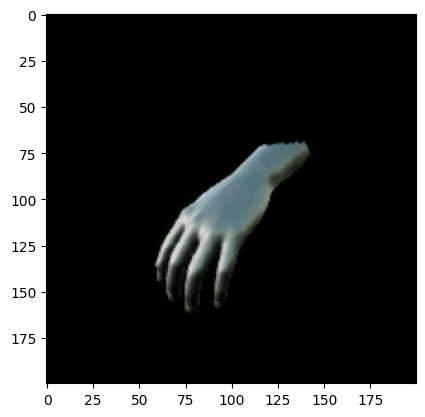

In [6]:
client.request('vset /object/SkyLight_1/hide')
client.request('vset /object/AtmosphericFog_1/hide')
client.request('vset /object/DirectionalLight2/hide')
client.request('vset /object/DirectionalLight_1/hide')
res = client.request('vget /camera/1/lit png')
im = read_png(res)
print(im.shape)
plt.imshow(im)